# Propriétés d'une population fictive de 130 personnes: analyse bivariée qualitative

Version du 3 avril 2023

130 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats.contingency import association

## Références bibliographiques

Référence:

* [Statistique descriptive bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Bennani: Bennani Dosse Mohammed, _Statistique bivariée avec R_, Rennes, PUR, 2011.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

obs = pd.read_csv(path)
obs.set_index('id', inplace=True)
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [3]:
## Nombre de lignes et de colonnes du tableau
obs.shape

(130, 5)

In [4]:
# Informations détaillées
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1 to 130
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              130 non-null    int64 
 1   n_foyer          130 non-null    int64 
 2   lecture_journal  130 non-null    object
 3   parti            130 non-null    object
 4   revenu_mensuel   130 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ KB


# Variable qualitative et quantitative

Text(0, 0.5, 'Parti politique')

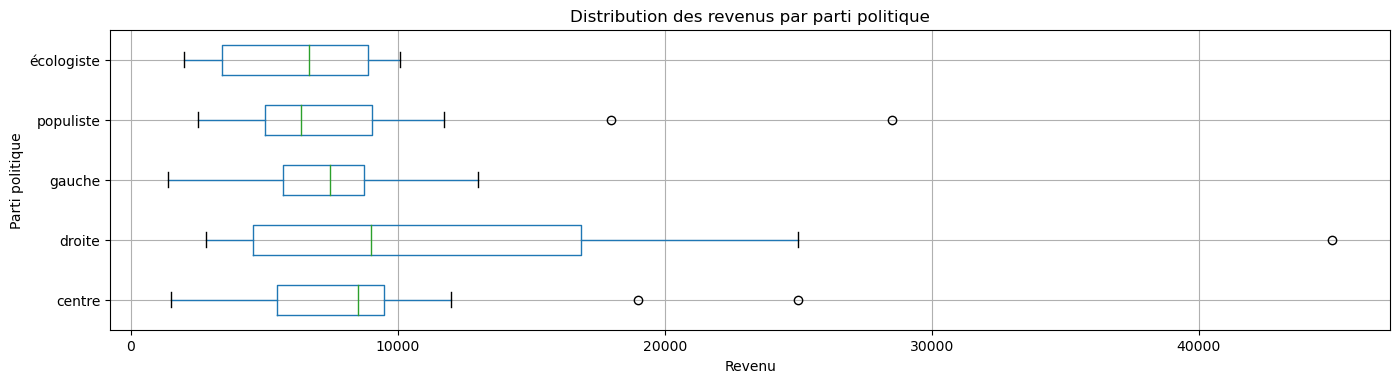

In [5]:
axes = obs.boxplot(column=['revenu_mensuel'],by=['parti'], vert=False, figsize=(16,4), )

fig = axes.get_figure()

fig.suptitle('')
    
axes.set_title('Distribution des revenus par parti politique')

axes.set_xlabel('Revenu')
axes.set_ylabel('Parti politique')


[]

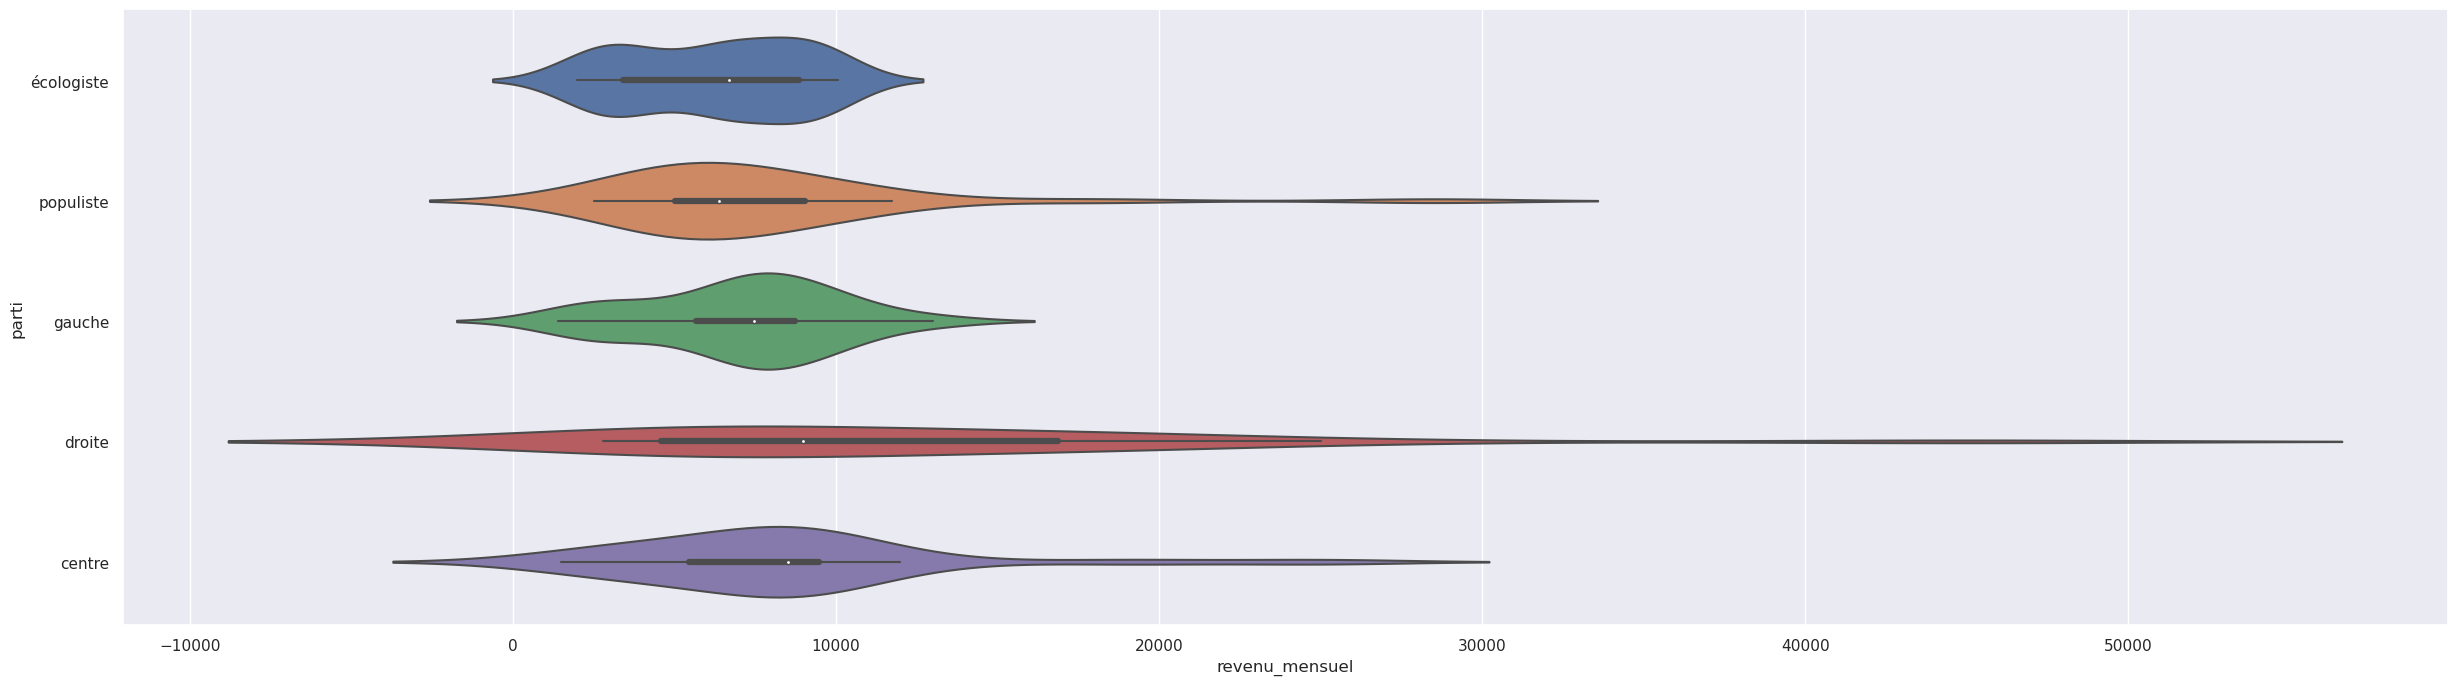

In [6]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

ax = sns.violinplot(x='revenu_mensuel', y ='parti', data = obs.sort_values('parti',ascending=False))

plt.plot()

In [7]:
obs[obs['parti'] == 'populiste']['revenu_mensuel'].describe()

count       30.000000
mean      7674.933333
std       5010.370700
min       2500.000000
25%       5036.750000
50%       6379.000000
75%       9032.750000
max      28500.000000
Name: revenu_mensuel, dtype: float64

# Deux variables qualitatives



Documentation:
* Hamon (cit.), Chapitre 4, 99-111.
* Bennani (cit.), Chapitre 2, 23-35.


In [8]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,"[36, 46)"
2,45,1,tous les jours,droite,7364,"[36, 46)"
3,54,3,de temps en temps,droite,8947,"[46, 56)"
4,86,2,tous les jours,populiste,6317,"[66, 91)"
5,77,2,tous les jours,gauche,6511,"[66, 91)"


In [9]:
type(c_obs.loc[1]['generation'])

pandas._libs.interval.Interval

In [10]:
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses

c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,36-45
2,45,1,tous les jours,droite,7364,36-45
3,54,3,de temps en temps,droite,8947,46-55
4,86,2,tous les jours,populiste,6317,66-90
5,77,2,tous les jours,gauche,6511,66-90


In [11]:
type(c_obs.loc[1]['generation'])

str

## Age et orientation politique

### Tableau de contingence

In [12]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "parti"  # "0"
Y = "generation"

c_obs_parti_generation = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_obs_parti_generation

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,3,2,2,2,9,18
26-35,2,1,5,2,12,22
36-45,1,6,8,5,6,26
46-55,4,3,2,5,0,14
56-65,4,1,0,5,1,11
66-90,11,5,6,11,6,39
Total,25,18,23,30,34,130


In [13]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

c_obs_parti_generation_frequence = np.round(c_obs_parti_generation*100/c_obs_parti_generation.iloc[-1,-1],1)
c_obs_parti_generation_frequence

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,2.3,1.5,1.5,1.5,6.9,13.8
26-35,1.5,0.8,3.8,1.5,9.2,16.9
36-45,0.8,4.6,6.2,3.8,4.6,20.0
46-55,3.1,2.3,1.5,3.8,0.0,10.8
56-65,3.1,0.8,0.0,3.8,0.8,8.5
66-90,8.5,3.8,4.6,8.5,4.6,30.0
Total,19.2,13.8,17.7,23.1,26.2,100.0


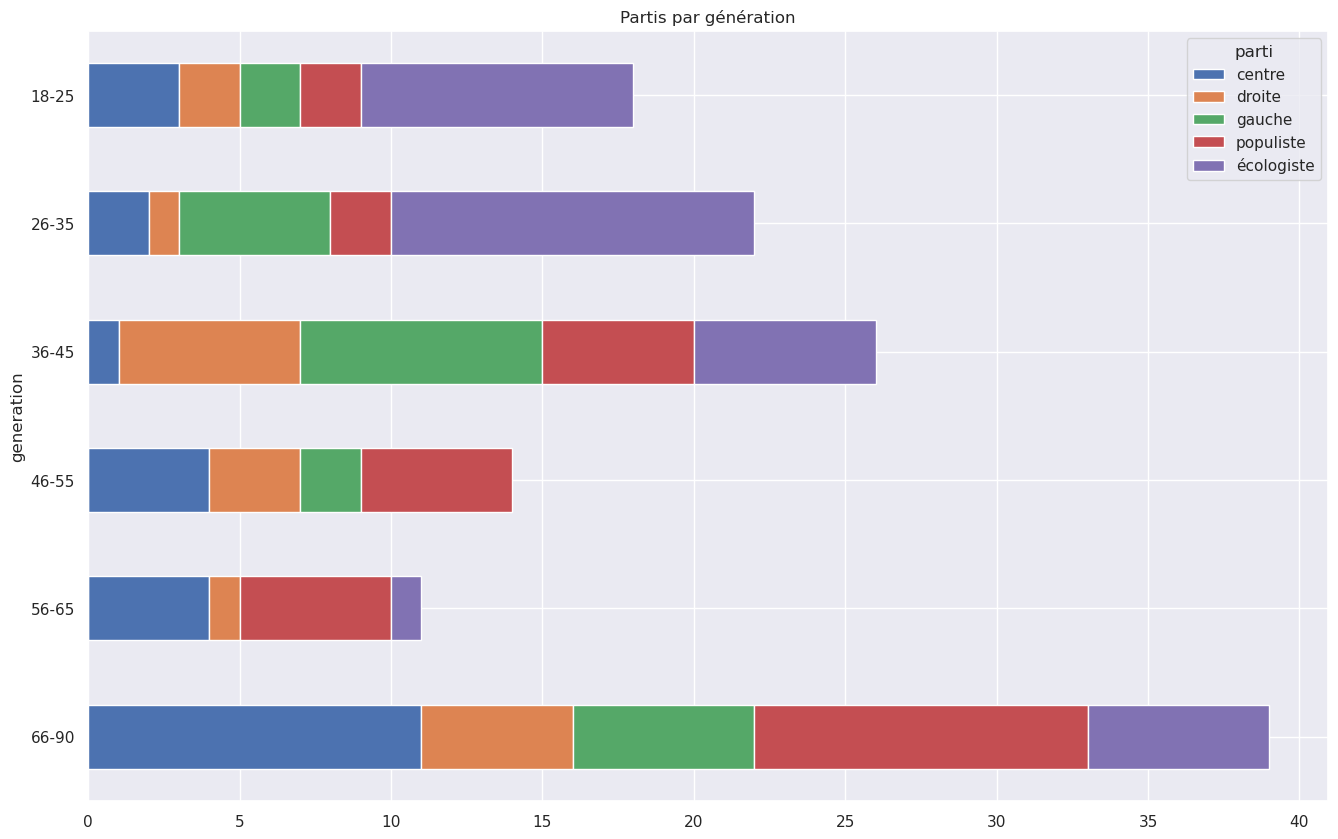

In [14]:
### Effectifs des partis par génération
g = c_obs_parti_generation.iloc[:-1, :-1].sort_index(ascending=False)\
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = 'Partis par génération')

In [15]:
### pourcentages des lignes
stacked_data_lignes = c_obs_parti_generation.apply(lambda x: (x*100/sum(x)*2).round(2), axis=1) # axis=0
stacked_data_lignes

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,16.67,11.11,11.11,11.11,50.00,100.0
26-35,9.09,4.55,22.73,9.09,54.55,100.0
36-45,3.85,23.08,30.77,19.23,23.08,100.0
46-55,28.57,21.43,14.29,35.71,0.00,100.0
56-65,36.36,9.09,0.00,45.45,9.09,100.0
66-90,28.21,12.82,15.38,28.21,15.38,100.0
Total,19.23,13.85,17.69,23.08,26.15,100.0


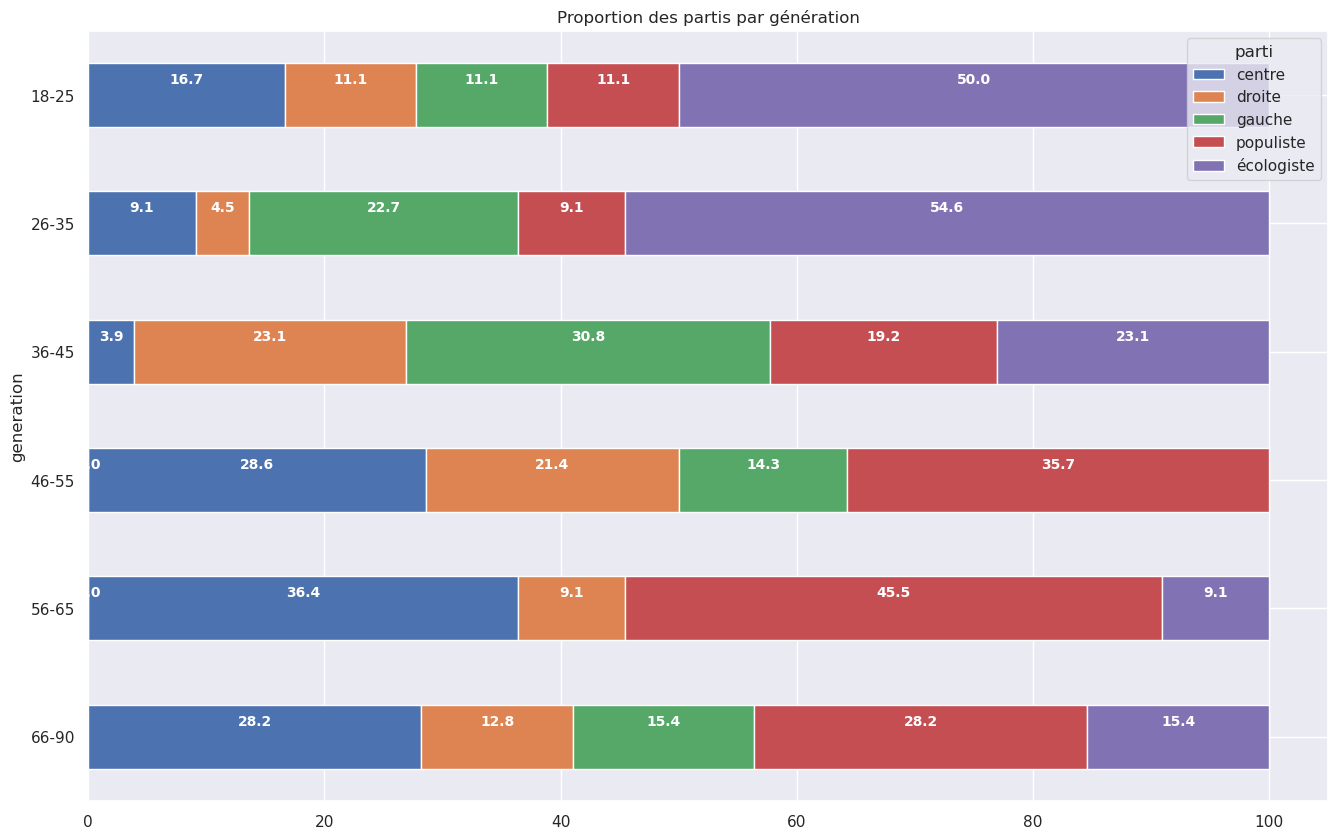

In [16]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = stacked_data_lignes.iloc[:-1, :-1].sort_index(ascending=False).plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [17]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data_cols = c_obs_parti_generation.apply(lambda x: round(x*100/sum(x)*2, 2), axis=0) 
stacked_data_cols

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,12.0,11.11,8.70,6.67,26.47,13.85
26-35,8.0,5.56,21.74,6.67,35.29,16.92
36-45,4.0,33.33,34.78,16.67,17.65,20.00
46-55,16.0,16.67,8.70,16.67,0.00,10.77
56-65,16.0,5.56,0.00,16.67,2.94,8.46
66-90,44.0,27.78,26.09,36.67,17.65,30.00
Total,100.0,100.00,100.00,100.00,100.00,100.00


In [18]:
### Ajouter des valeurs pour le tri des colonnes
stacked_data_cols.loc['sort_index'] = [3,4,2,5,1,None]
stacked_data_cols

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,12.0,11.11,8.70,6.67,26.47,13.85
26-35,8.0,5.56,21.74,6.67,35.29,16.92
36-45,4.0,33.33,34.78,16.67,17.65,20.00
46-55,16.0,16.67,8.70,16.67,0.00,10.77
56-65,16.0,5.56,0.00,16.67,2.94,8.46
66-90,44.0,27.78,26.09,36.67,17.65,30.00
Total,100.0,100.00,100.00,100.00,100.00,100.00
sort_index,3.0,4.00,2.00,5.00,1.00,NaN


In [19]:
### Interchanger les lignes avec les colonnes (=transposer) 
#  afin d'utiliser le même affichage en diagramme à barres
ts_stacked_data_cols = stacked_data_cols.transpose().sort_values(by='sort_index')
ts_stacked_data_cols

generation,18-25,26-35,36-45,46-55,56-65,66-90,Total,sort_index
parti,,,,,,,,
écologiste,26.47,35.29,17.65,0.00,2.94,17.65,100.0,1.0
gauche,8.70,21.74,34.78,8.70,0.00,26.09,100.0,2.0
centre,12.00,8.00,4.00,16.00,16.00,44.00,100.0,3.0
droite,11.11,5.56,33.33,16.67,5.56,27.78,100.0,4.0
populiste,6.67,6.67,16.67,16.67,16.67,36.67,100.0,5.0
Total,13.85,16.92,20.00,10.77,8.46,30.00,100.0,NaN


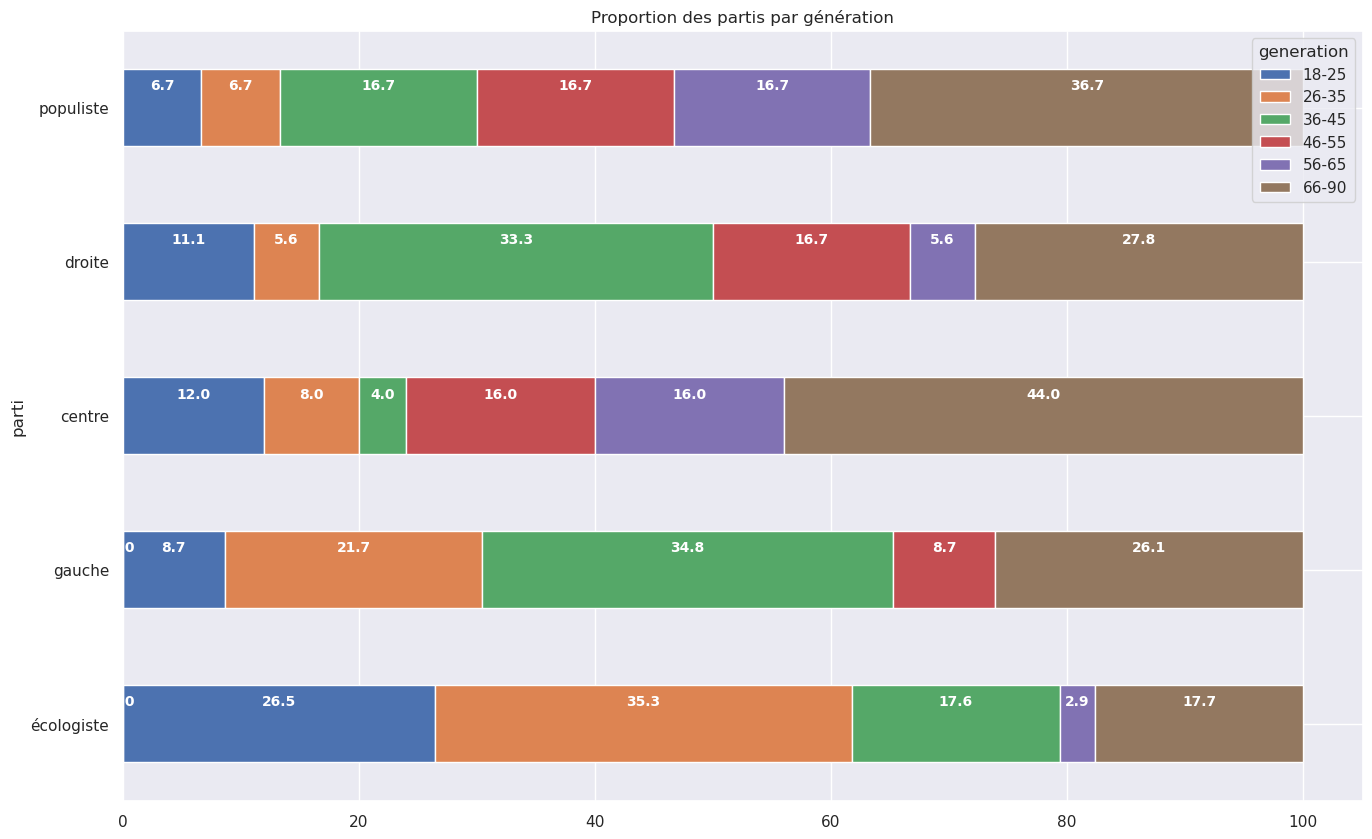

In [20]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = ts_stacked_data_cols.iloc[:-1, :-2].plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Tableau théorique en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [21]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_generation.iat[-1,-1]

130

In [22]:
tx = c_obs_parti_generation.loc[:,["Total"]]
ty = c_obs_parti_generation.loc[["Total"],:]
n = c_obs_parti_generation.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Non arrondi
print(indep)

print('\n--------------------------\n')
# Arrondi
print(indep.round(0).astype(int))



parti          centre     droite     gauche  populiste  écologiste  Total
generation                                                               
18-25        3.461538   2.492308   3.184615   4.153846    4.707692   18.0
26-35        4.230769   3.046154   3.892308   5.076923    5.753846   22.0
36-45        5.000000   3.600000   4.600000   6.000000    6.800000   26.0
46-55        2.692308   1.938462   2.476923   3.230769    3.661538   14.0
56-65        2.115385   1.523077   1.946154   2.538462    2.876923   11.0
66-90        7.500000   5.400000   6.900000   9.000000   10.200000   39.0
Total       25.000000  18.000000  23.000000  30.000000   34.000000  130.0

--------------------------

parti       centre  droite  gauche  populiste  écologiste  Total
generation                                                      
18-25            3       2       3          4           5     18
26-35            4       3       4          5           6     22
36-45            5       4       5          6

In [23]:
### Différence en effectifs entre le théorique et l'observé
#  Valeurs arrondies
### Doc. :
#   Bennani, p.30
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_generation-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.round(0).astype(int))


parti       centre  droite  gauche  populiste  écologiste
generation                                               
18-25            0       0      -1         -2           4
26-35           -2      -2       1         -3           6
36-45           -4       2       3         -1          -1
46-55            1       1       0          2          -4
56-65            2      -1      -2          2          -2
66-90            4       0      -1          2          -4


In [34]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#   Bennani, p.31
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = round((c_obs_parti_generation-indep)**2/indep,2)
ecarts_ponderes.iloc[:-1,:-1]


parti,centre,droite,gauche,populiste,écologiste
generation,,,,,
18-25,0.06,0.10,0.44,1.12,3.91
26-35,1.18,1.37,0.32,1.86,6.78
36-45,3.20,1.60,2.51,0.17,0.09
46-55,0.64,0.58,0.09,0.97,3.66
56-65,1.68,0.18,1.95,2.39,1.22
66-90,1.63,0.03,0.12,0.44,1.73


In [35]:
colonnes = ecarts_ponderes.sum()
print(colonnes)

parti
centre         8.39
droite         3.86
gauche         5.43
populiste      6.95
écologiste    17.39
Total          0.00
dtype: float64


In [36]:
chi_2 = ecarts_ponderes.sum().sum()
print(round(chi_2, 2))

42.02


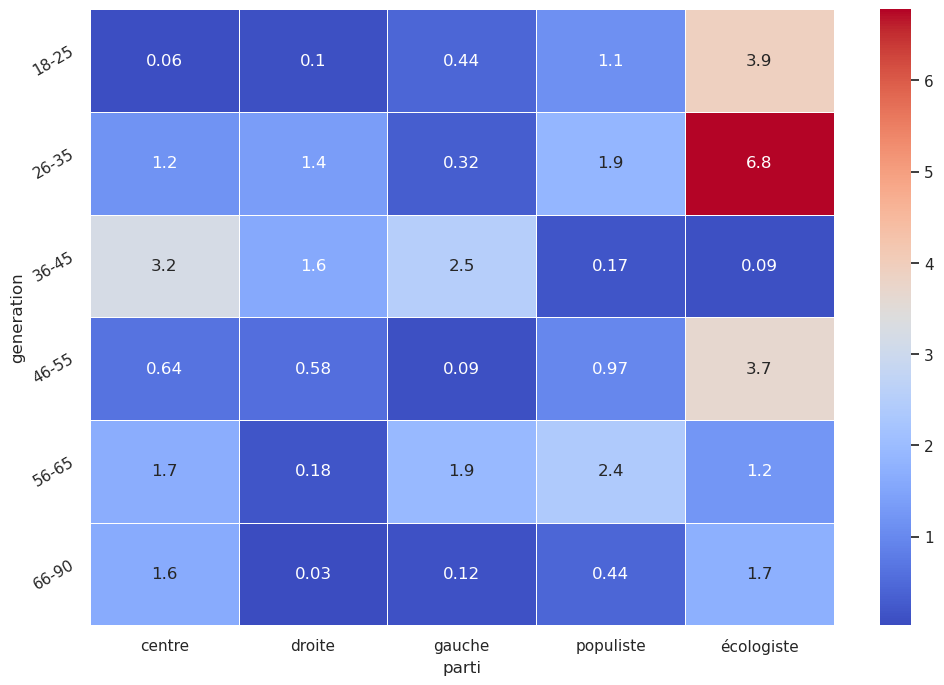

In [37]:
### Écart pondérés
tableau = ecarts_ponderes.iloc[:-1,:-1]

fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

In [38]:
### Degrés d'indépendance
(len(ecarts_ponderes)-2) * (len(ecarts_ponderes.columns)-2), len(ecarts_ponderes)-1,len(ecarts_ponderes.columns)-1

(20, 6, 5)

### Rejet de l'hypothèse d'indépendance ?

L'hypothèse H0 est celle de l'indépendace des variables

* valeur critique pour 20 degrés de liberté, à 5 % (= 0.05), Bennani, p.277, tableau D2 = __31.41__
   * cf. https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2
   *  https://www.statology.org/chi-square-distribution-table/
 
 
* chi-2 mesuré = __42.02__

* P-value:  0.002749 (cf. https://www.statology.org/chi-square-p-value-calculator/)


Le chi-2 est donc supérieur à la valeur critique à 5 % d'erreur, donc H0 (hypothèse d'indépendance) peut être rejetée. Il y aurait un certain lien entre âge et orientation politique en général. 

On remarque des spécificités intéressantes pour certaines classes d'âge, par ex. les 26-35 ans ont une préférence pour l'orientation écologiste


In [39]:
### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

## Le résultat montre un certain lien entre les variables, mais plutôt faible,
# le coééficient V de Cramer se situant entre 0 (absence d'association) et 1 (association parfaite),
# cf. Bennani, 36-37.
# Noter que les effectifs de certaines paries de valeurs 
# sont probablement insuffisant pour que ces tests soient valides, cf. Bennani, p. 38
association(c_obs_parti_generation.iloc[:-1,:-1], method='cramer')

0.2842809293831684

In [48]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes.iloc[:-1,:-1]/chi_2
table['total'] = table.sum(axis=1)
table.loc['total'] = table.sum(axis=0)
table

parti,centre,droite,gauche,populiste,écologiste,total
generation,,,,,,
18-25,0.001428,0.002380,0.010471,0.026654,0.093051,0.133984
26-35,0.028082,0.032604,0.007615,0.044265,0.161352,0.273917
36-45,0.076154,0.038077,0.059733,0.004046,0.002142,0.180152
46-55,0.015231,0.013803,0.002142,0.023084,0.087101,0.141361
56-65,0.039981,0.004284,0.046406,0.056878,0.029034,0.176583
66-90,0.038791,0.000714,0.002856,0.010471,0.041171,0.094003
total,0.199667,0.091861,0.129224,0.165397,0.413851,1.000000


In [49]:
### % plus lisibles
rt = round(table*100,2)
rt

parti,centre,droite,gauche,populiste,écologiste,total
generation,,,,,,
18-25,0.14,0.24,1.05,2.67,9.31,13.40
26-35,2.81,3.26,0.76,4.43,16.14,27.39
36-45,7.62,3.81,5.97,0.40,0.21,18.02
46-55,1.52,1.38,0.21,2.31,8.71,14.14
56-65,4.00,0.43,4.64,5.69,2.90,17.66
66-90,3.88,0.07,0.29,1.05,4.12,9.40
total,19.97,9.19,12.92,16.54,41.39,100.00


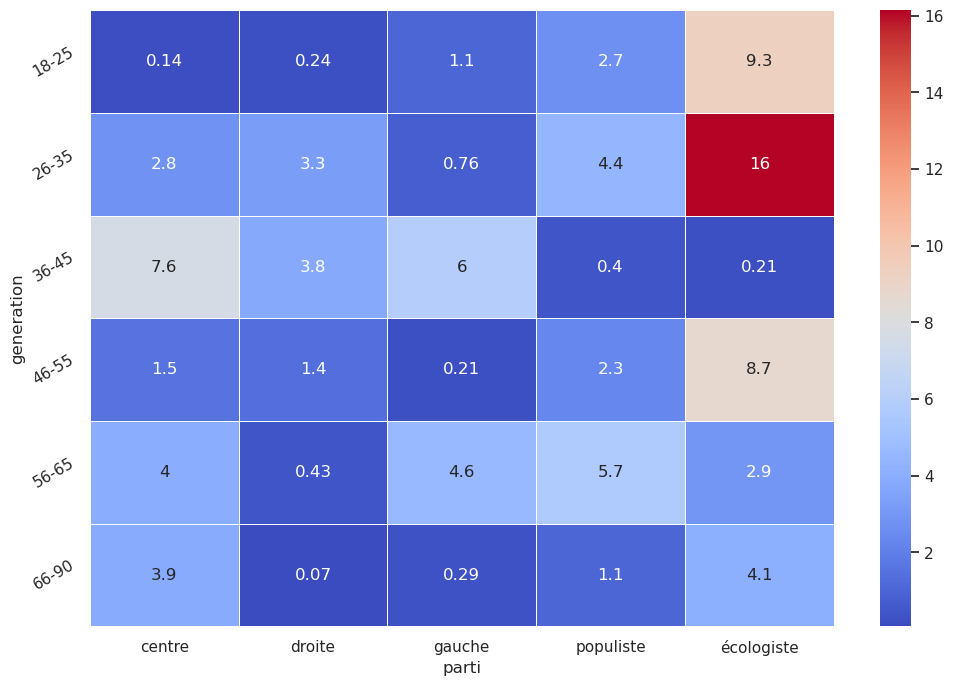

In [53]:
### Proportion des contributions au chi-2
tableau = rt.iloc[:-1,:-1]

fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

## Orientation politique et fréquence de lecture du journal

In [54]:
X = "parti"  # "0"
Y = "lecture_journal"

c_obs_parti_lecture = c_obs[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int) 
c_obs_parti_lecture

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,Total
parti,,,,,,
centre,5,6,3,6,5,25
droite,2,4,5,4,3,18
gauche,3,3,2,5,10,23
populiste,4,9,3,9,5,30
écologiste,3,7,6,11,7,34
Total,17,29,19,35,30,130


In [55]:
c_obs_parti_lecture = c_obs_parti_lecture[['très rarement', 'de temps en temps', 'le week-end', 'trois-quatre fois par semaine', 'tous les jours','Total']]
c_obs_parti_lecture

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,Total
parti,,,,,,
centre,5,5,6,6,3,25
droite,3,2,4,4,5,18
gauche,10,3,3,5,2,23
populiste,5,4,9,9,3,30
écologiste,7,3,7,11,6,34
Total,30,17,29,35,19,130


In [56]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_lecture.iat[-1,-1]

130

In [57]:
c_obs_parti_lecture.iloc[:-1,:-1]

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,5,5,6,6,3
droite,3,2,4,4,5
gauche,10,3,3,5,2
populiste,5,4,9,9,3
écologiste,7,3,7,11,6


In [58]:
tx = c_obs_parti_lecture.loc[:,["Total"]]
ty = c_obs_parti_lecture.loc[["Total"],:]
n = c_obs_parti_lecture.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
display(indep.astype(int))


lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,Total
parti,,,,,,
centre,5,3,5,6,3,25
droite,4,2,4,4,2,18
gauche,5,3,5,6,3,23
populiste,6,3,6,8,4,30
écologiste,7,4,7,9,4,34
Total,30,17,29,35,19,130


In [59]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_lecture-indep)
## Attention : arrondi aux entiers dans l'affichage
display(ecarts.iloc[:-1,:-1].astype(int))


lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,0,1,0,0,0
droite,-1,0,0,0,2
gauche,4,0,-2,-1,-1
populiste,-1,0,2,0,-1
écologiste,0,-1,0,1,1


In [60]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
#  le chi2 : (valeur observée - valeur attendue)²/valeur attendue
ecarts_ponderes = ((c_obs_parti_lecture-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,0.102564,0.916290,0.032095,0.079341,0.117004
droite,0.320513,0.053193,0.000059,0.147741,2.133693
gauche,4.148272,0.000020,0.884892,0.229575,0.551470
populiste,0.534188,0.001508,0.795756,0.105495,0.437247
écologiste,0.091252,0.470375,0.045062,0.372334,0.213813


12.784


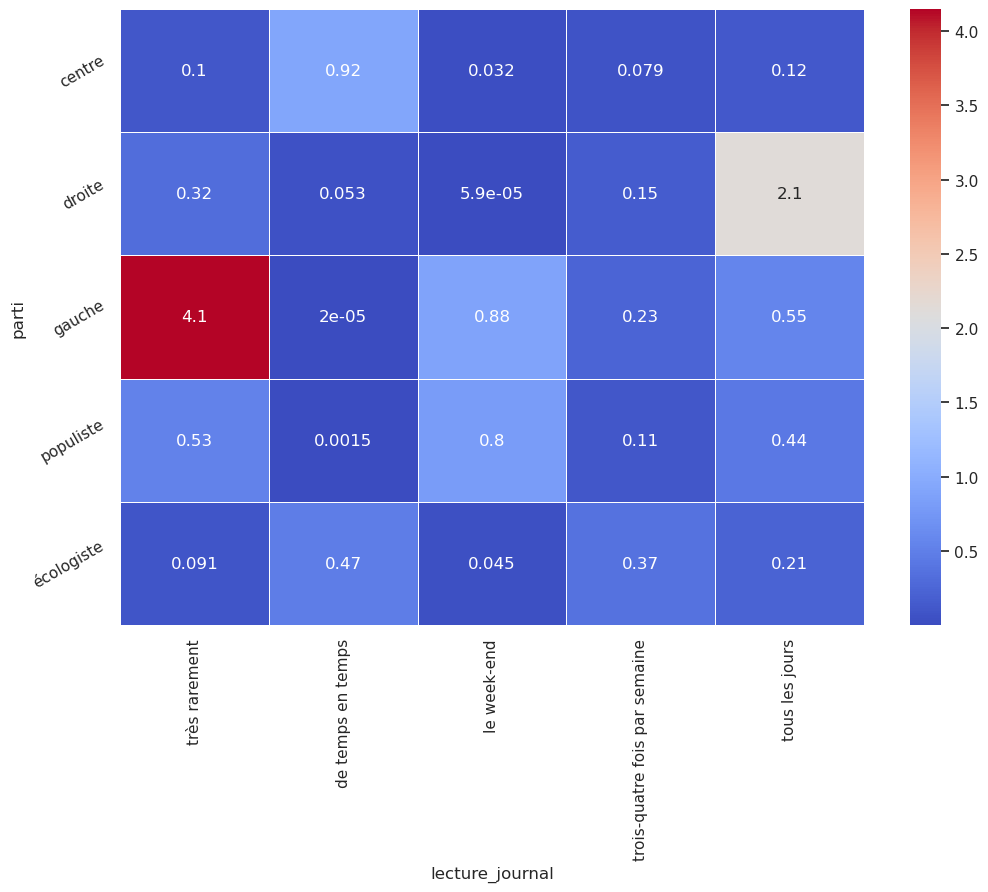

In [63]:
## Chi2 :somme des écarts pondérés

chi_2 = ecarts_ponderes.sum().sum() 
print(round(chi_2,3))


fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index

p = g.set_yticklabels(labels, rotation=30)

In [64]:
### Degrés d'indépendance
(len(ecarts_ponderes)-1) * (len(ecarts_ponderes.columns)-1), len(ecarts_ponderes),len(ecarts_ponderes.columns)

(16, 5, 5)

### Rejet de l'hypothèse d'indépendance ?

Ce n'est pas possible dans ce cas:

* valeur critique pour 16 degrés de liberté, à 5 % (= 0.05), Bennani, p.277, tableau D2 = 26.296
   * cf. https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2
   * https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2
   * [Test du khi-deux d'indépendance](https://www.jmp.com/fr_fr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html)
   * https://www.statology.org/chi-square-distribution-table/
   * https://www.statology.org/chi-square-test-of-independence-python/
   
<br/>   

* chi-2 = 12.784

* P-value:  0.688481 (cf. https://www.statology.org/chi-square-p-value-calculator/)

Le chi-2 n'est donc pas supérieur à la valeur critique à 5 % d'erreur, donc les variables paraissent indépendantes, H0 (hypothèse d'indépendance) ne peut pas être rejetée. Il n'y a pas de lien entre orientation politique et fréquence de lecture en général. 

Toutefois on remarque des spécificités intéressantes pour certains cas de figure.


In [68]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes/chi_2
table['total'] = table.sum(axis=1)
table.loc['total'] = table.sum(axis=0)
table

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,total
parti,,,,,,
centre,0.008023,0.071676,0.002511,0.006206,0.009153,0.097569
droite,0.025072,0.004161,0.000005,0.011557,0.166907,0.207701
gauche,0.324496,0.000002,0.069220,0.017958,0.043138,0.454814
populiste,0.041786,0.000118,0.062247,0.008252,0.034203,0.146608
écologiste,0.007138,0.036795,0.003525,0.029126,0.016725,0.093309
total,0.406515,0.112751,0.137508,0.073099,0.270126,1.000000


In [70]:
### % plus lisibles
rt = round(table*100,2)

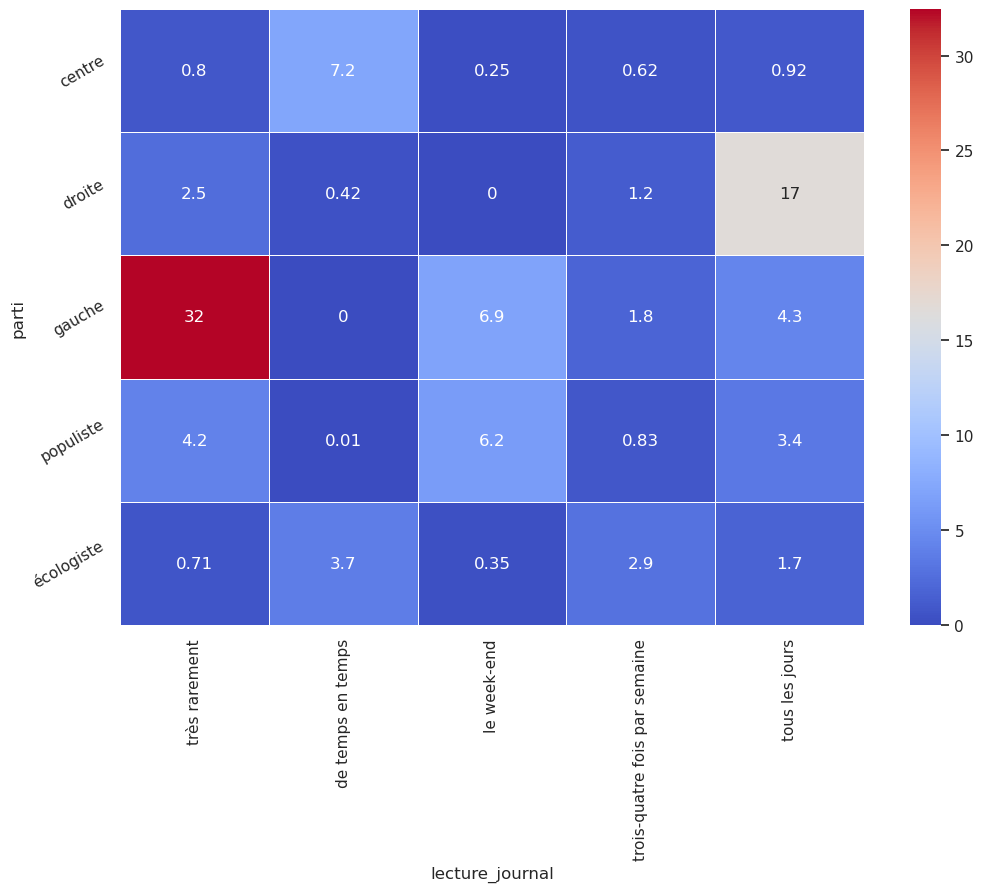

In [71]:
### Proportion des contributions au chi-2
tableau = rt.iloc[:-1,:-1]

fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()